## Ch 13 - Multiple Description Coding

Reference: Ch 13 of A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011.

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(
    solver = "ortools.GLOP",    # Set linear programming solver
    repr_latex = True,          # Jupyter Notebook LaTeX display
    venn_latex = True,          # LaTeX in diagrams
    proof_note_color = "blue",  # Reasons in proofs are blue
)

### Thm 13.1 (El Gamal-Cover Inner Bound)

Refer to Thm 13.4

### Thm 13.2 (Quadratic Gaussian Multiple Description Coding)

Skipped

### Thm 13.3 (Successive Refinement)


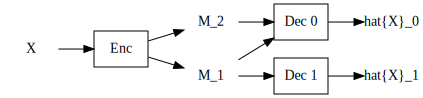

In [2]:
X, U = rv("X, U")
Xh0, Xh1 = rv_array("\hat{X}", 2)
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

# Define successive refinement coding [Equitz-Cover 1991] [Rimoldi 1994]
model = CodingModel()
model.set_rate(M1, R1)        # The rate of M1, M2 are R1, R2 resp.
model.set_rate(M2, R2)
model.add_node(X, M1+M2,      # Encoder maps X to M1,M2
    label = "Enc")
model.add_node(M1+M2, Xh0,
            label = "Dec 0")  # Decoder 0 maps M1,M2 to Xh0
model.add_node(M1, Xh1,
            label = "Dec 1")  # Decoder 1 maps M1 to Xh1

model.graph()                 # Draw diagram

In [3]:
# Automatic inner bound, recovers [Equitz-Cover 1991], [Rimoldi 1994]
r = model.get_inner(is_proof=True)
r.display(note=True)

<IPython.core.display.Math object>

In [4]:
# Automatic outer bound with 0 auxiliary, coincides with inner bound
model.get_outer(0)

( ( R_2 >= 0 )
 &( R_1 >= I(X&\hat{X}_1) )
 &( R_1+R_2 >= I(X&\hat{X}_0+\hat{X}_1) ) )

In [5]:
# Converse proof
model.proof_outer(r)

### Thm 13.4 (Zhang-Berger Inner Bound)


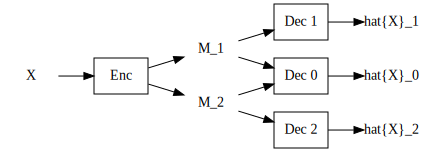

In [6]:
X, U = rv("X, U")
Xh0, Xh1, Xh2 = rv_array("\hat{X}", 3)
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

model = CodingModel()         # Define multiple description coding
model.set_rate(M1, R1)        # The rate of M1, M2 are R1, R2 resp.
model.set_rate(M2, R2)
model.add_node(X, M1+M2,
            label = "Enc")    # Encoder maps X to M1,M2
model.add_node(M1+M2, Xh0,
            label = "Dec 0")  # Decoder 0 maps M1,M2 to Xh0
model.add_node(M1, Xh1,
            label = "Dec 1")  # Decoder 1 maps M1 to Xh1
model.add_node(M2, Xh2,
            label = "Dec 2")  # Decoder 2 maps M2 to Xh2

model.graph()                 # Draw diagram

In [7]:
# Automatic inner bound, recovers [Zhang-Berger 1987]
r = model.get_inner(is_proof=True)
r.display(note=True)

<IPython.core.display.Math object>

In [8]:
# Prove the above is equivalent to the VKG region [Venkataramani-Kramer-Goyal 2003]
U = rv("U")
r_vkg = region(
    R1 >= I(X & Xh1 + U),
    R2 >= I(X & Xh2 + U),
    R1 + R2 >= I(X & Xh0+Xh1+Xh2 | U) + 2 * I(U & X) + I(Xh1 & Xh2 | U)
).exists(U)
r_vkg

( ( R_1 >= I(X&\hat{X}_1+U) )
 &( R_2 >= I(X&\hat{X}_2+U) )
 &( R_1+R_2 >= I(X&\hat{X}_0+\hat{X}_1+\hat{X}_2+U)+I(U&X)+I(\hat{X}_1&\hat{X}_2|U) ) ).exists(U)

In [9]:
(r >> r_vkg).proof()  # One direction of equivalence

In [11]:
# The other direction requires functional representation lemma and cases to prove
#  [Wang-Chen-Zhao-Cuff-Permuter 2011]

with sfrl().assumed(), PsiOpts(cases = True):
    (r_vkg >> r).proof().display()

<IPython.core.display.Math object>

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 13.
- W. H. Equitz and T. M. Cover, "Successive refinement of information," IEEE Transactions on Information Theory, vol. 37, no. 2, pp. 269-275, 1991.
- B. Rimoldi, "Successive refinement of information: Characterization of the achievable rates," IEEE Transactions on Information Theory, vol. 40, no. 1, pp. 253-259, 1994.
- Z. Zhang and T. Berger, "New results in binary multiple descriptions," IEEE Trans. Inf. Theory, vol. 33, no. 4, pp. 50–521, Jul. 1987.
- Wang, J., Chen, J., Zhao, L., Cuff, P., & Permuter, H. (2011). On the role of the refinement layer in multiple description coding and scalable coding. IEEE transactions on information theory, 57(3), 1443-1456.
- R. Venkataramani, G. Kramer, and V. K. Goyal, "Multiple description coding with many channels," IEEE Trans. Inf. Theory, vol. 49, no. 9, pp. 2106–2114, Sep. 2003.
